In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd


# Load the Iris dataset from a CSV file in Google Drive
iris_df = pd.read_csv('/content/iris.data')



In [32]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=723db84de6100db918862d5e51bbe59977e4d67a21e6783e91fd39e23b796ad8
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [33]:
import minisom

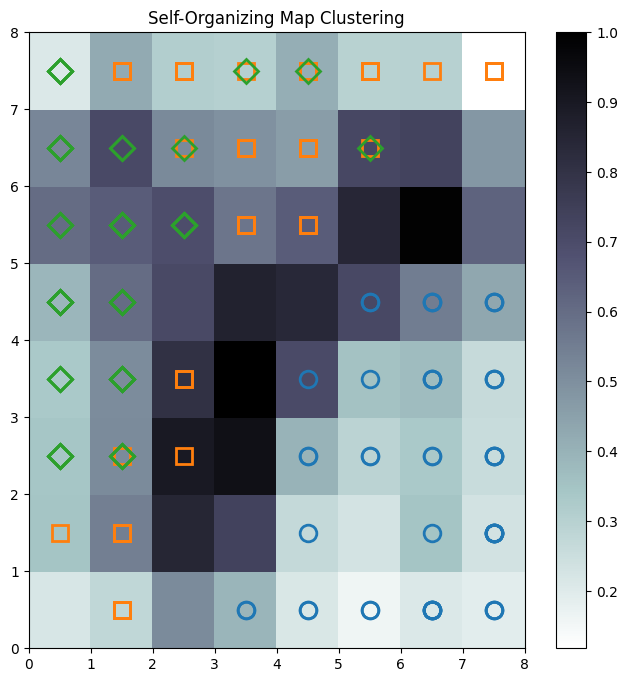

In [34]:
import numpy as np
from sklearn.datasets import load_iris
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Initialize the SOM
som = MiniSom(x=8, y=8, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(X_normalized)

# Train the SOM
som.train_batch(X_normalized, 1000)

# Plot the SOM
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Mark the different clusters
target = iris.target
t = np.zeros(len(target), dtype=int)
t[target == 0] = 0
t[target == 1] = 1
t[target == 2] = 2

# Use different colors and markers for each class
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_normalized):
    w = som.winner(xx)  # getting the winner
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[t[cnt]], markerfacecolor='None', markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.title('Self-Organizing Map Clustering')
plt.show()


In [ ]:
!pip install minisom